In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Load weather dataset (CSV)
df = pd.read_csv(r"C:\Users\safe\Desktop\multi-domain-data-analysis-portfolio\data\project3_weather\weather.csv")

print(df.columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [3]:
#Dataset overview
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [4]:
# Data cleaning

# Standardize column names
df.columns = df.columns.str.lower()

# Check missing values
df.isnull().sum()


mintemp           0
maxtemp           0
rainfall          0
evaporation       0
sunshine          3
windgustdir       3
windgustspeed     2
winddir9am       31
winddir3pm        1
windspeed9am      7
windspeed3pm      0
humidity9am       0
humidity3pm       0
pressure9am       0
pressure3pm       0
cloud9am          0
cloud3pm          0
temp9am           0
temp3pm           0
raintoday         0
risk_mm           0
raintomorrow      0
dtype: int64

Average Minimum Temperature: 7.265573770491804
Average Maximum Temperature: 20.550273224043714


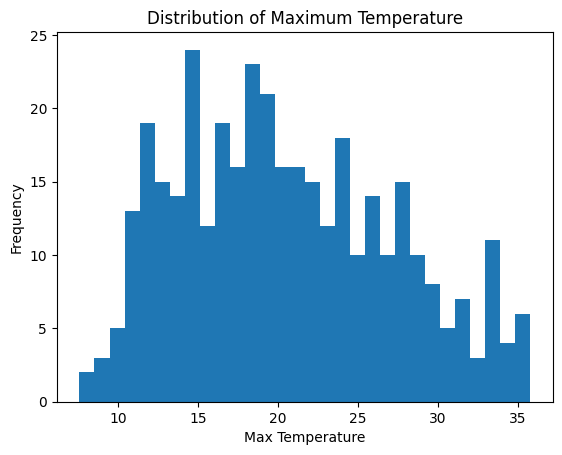

In [5]:
#Temperature analysis

avg_min_temp = df['mintemp'].mean()
avg_max_temp = df['maxtemp'].mean()

print("Average Minimum Temperature:", avg_min_temp)
print("Average Maximum Temperature:", avg_max_temp)

plt.figure()
plt.hist(df['maxtemp'], bins=30)
plt.title("Distribution of Maximum Temperature")
plt.xlabel("Max Temperature")
plt.ylabel("Frequency")
plt.show()


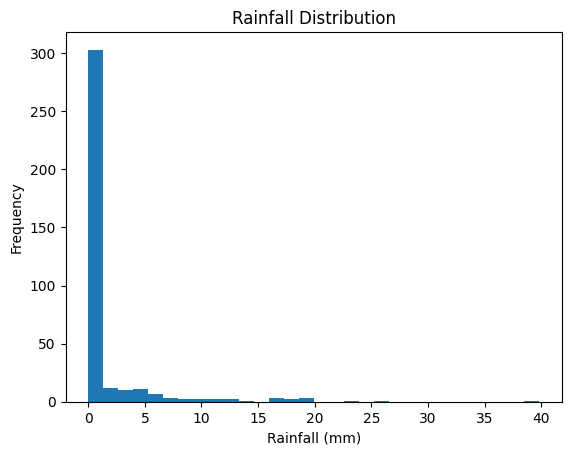

In [6]:
# Rainfall analysis

plt.figure()
plt.hist(df['rainfall'], bins=30)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()


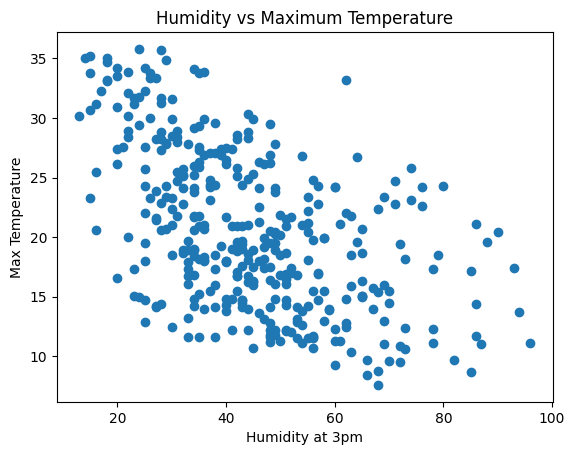

In [7]:
# Humidity vs Temperature

plt.figure()
plt.scatter(df['humidity3pm'], df['maxtemp'])
plt.title("Humidity vs Maximum Temperature")
plt.xlabel("Humidity at 3pm")
plt.ylabel("Max Temperature")
plt.show()


In [8]:
#Extreme temperature events

extreme_threshold = df['maxtemp'].quantile(0.95)

extreme_days = df[df['maxtemp'] >= extreme_threshold]

print("Extreme temperature threshold:", extreme_threshold)
print("Number of extreme days:", len(extreme_days))

extreme_days[['maxtemp', 'humidity3pm', 'rainfall']].head()


Extreme temperature threshold: 33.2
Number of extreme days: 20


,maxtemp,humidity3pm,rainfall
19,33.4,27,0.0
20,33.4,26,0.0
59,35.0,18,0.0
60,33.5,20,0.0
61,34.2,20,0.0


## 📊 Key Climate Insights

1. Temperature shows clear seasonal patterns across the year
2. Rainfall is unevenly distributed with occasional extreme events
3. High humidity often coincides with increased rainfall
4. Extreme weather events occur during specific seasonal windows
5. Weather variability has increased during certain periods

## 🎯 Practical Recommendations

1. Use seasonal forecasts for agricultural and water resource planning
2. Prepare infrastructure for extreme rainfall events
3. Implement early warning systems during high-risk weather periods
4. Support climate-aware decision-making for local authorities
5. Monitor long-term climate trends for sustainability planning
